# Ejercicio: Tablas de Crecimiento

In [0]:
# si no usamos el docker hay q instalar estas librerios

#!pip install -q gmplot
#!pip install textacy
#!pip install spacy
#!python -m spacy download es_core_news_md

*   Descargar dataset #1 y #2 en CSV [links](https://www.google.com/url?q=https://www.cdc.gov/growthcharts/percentile_data_files.htm&sa=D&ust=1526828193476000&usg=AFQjCNFcF89XwcM6kku7gdlMYJpSzVQE6g)


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

from gmplot import gmplot
from IPython.display import FileLink, HTML

np.random.seed(0)

# Gráficos de peso por edad, desde el nacimiento hasta los 36 meses, 
# parámetros LMS y percentiles de peso suavizado en kilogramos, 
# por sexo y edad
link1 = "https://www.cdc.gov/growthcharts/data/zscore/wtageinf.csv"
weight = pd.read_csv(link1)

# Gráficos de longitud para la edad, desde el nacimiento hasta los 
# 36 meses, parámetros LMS y percentiles seleccionados de longitud 
# recostada en centímetros, por sexo y edad
link2 = "https://www.cdc.gov/growthcharts/data/zscore/lenageinf.csv"
height = pd.read_csv(link2)

*   Graficar las curvas correspondientes a cada percentil para niños y niñas



## Peso

### Análisis exploratorio

In [80]:
weight.dtypes

Sex         int64
Agemos    float64
L         float64
M         float64
S         float64
P3        float64
P5        float64
P10       float64
P25       float64
P50       float64
P75       float64
P90       float64
P95       float64
P97       float64
dtype: object

In [81]:
weight.sample(5)

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
52,2,13.5,-0.223559,9.944226,0.106183,8.179356,8.378425,8.696684,9.262185,9.944226,10.688742,11.417920,11.883477,12.198293
57,2,18.5,-0.507701,11.088682,0.105144,9.184160,9.394782,9.733630,10.342415,11.088682,11.919211,12.749637,13.289041,13.657990
22,1,21.5,-0.168179,12.301541,0.108067,10.073105,10.325070,10.727592,11.441847,12.301541,13.237653,14.152010,14.734482,15.127765
75,2,36.0,-1.016653,13.865074,0.118939,11.334045,11.599289,12.033121,12.835999,13.865074,15.075293,16.362500,17.244688,17.870885
28,1,27.5,-0.295755,13.154497,0.108605,10.787982,11.052801,11.477280,12.234907,13.154497,14.165673,15.163512,15.804500,16.239671


In [82]:
weight.describe()

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,1.500000,18.000000,-0.159380,10.500653,0.113703,8.555646,8.774327,9.123940,9.746218,10.500653,11.331908,12.156645,12.689973,13.054045
std,0.503322,10.994544,0.627920,2.997212,0.009747,2.581549,2.619041,2.684415,2.815592,2.997212,3.223077,3.471963,3.645593,3.769782
min,1.000000,0.000000,-1.016653,3.399186,0.105084,2.355451,2.526904,2.747222,3.064865,3.399186,3.717519,3.992572,4.152637,4.254922
25%,1.000000,8.500000,-0.562695,8.681272,0.108187,7.040830,7.228790,7.527762,8.054299,8.681272,9.355576,10.015958,10.440824,10.726893
50%,1.500000,18.000000,-0.188634,11.351482,0.110096,9.344228,9.568433,9.927990,10.570385,11.351482,12.212520,13.064862,13.613989,13.987582
75%,2.000000,27.500000,-0.018852,12.884560,0.115375,10.576634,10.832864,11.244542,11.982543,12.884560,13.885523,14.877694,15.570395,16.051213
max,2.000000,36.000000,1.815151,14.329944,0.152385,11.759784,12.039910,12.492682,13.312776,14.329944,15.477724,16.642369,17.408165,17.936247


In [83]:
weight.shape

(76, 14)

### Gráficos

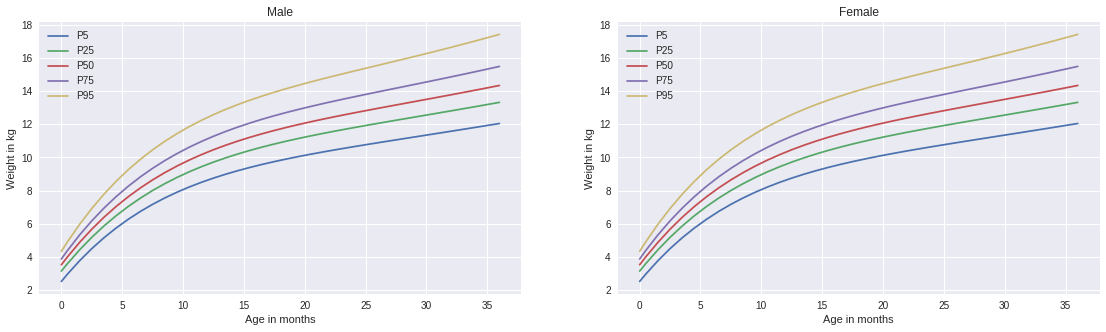

In [84]:
male = weight.loc[weight['Sex'] == 1]
female = weight.loc[weight['Sex'] == 2]

fig, ax = plt.subplots(nrows=1, 
                       ncols=2, 
                       figsize=(19,5))

ax[0].set_title("Male")

for n in [male]:
    ax[0].plot(male.Agemos, male.P5, label="P5")
    ax[0].plot(male.Agemos, male.P25, label="P25")
    ax[0].plot(male.Agemos, male.P50, label="P50")
    ax[0].plot(male.Agemos, male.P75, label="P75")
    ax[0].plot(male.Agemos, male.P95, label="P95")

ax[0].set_xlabel('Age in months')
ax[0].set_ylabel('Weight in kg')

leg = ax[0].legend(loc=9, mode="expand")

ax[1].set_title("Female")

for n in [female]:
    ax[1].plot(female.Agemos, male.P5, label="P5")
    ax[1].plot(female.Agemos, male.P25, label="P25")
    ax[1].plot(female.Agemos, male.P50, label="P50")
    ax[1].plot(female.Agemos, male.P75, label="P75")
    ax[1].plot(female.Agemos, male.P95, label="P95")

ax[1].set_xlabel('Age in months')
ax[1].set_ylabel('Weight in kg')

leg = ax[1].legend(loc=9, mode="expand")

plt.show()

## Altura

### Análisis exploratorio

In [85]:
height.dtypes

Sex       object
Agemos    object
L         object
M         object
S         object
P3        object
P5        object
P10       object
P25       object
P50       object
P75       object
P90       object
P95       object
P97       object
Pub3      object
Pub5      object
Pub10     object
Pub25     object
Pub50     object
Pub75     object
Pub90     object
Pub95     object
Pub97     object
Diff3     object
Diff5     object
Diff10    object
Diff25    object
Diff50    object
Diff75    object
Diff90    object
Diff95    object
Diff97    object
dtype: object

In [86]:
height.head(5)

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,...,Pub97,Diff3,Diff5,Diff10,Diff25,Diff50,Diff75,Diff90,Diff95,Diff97
0,1,0,1.267004226,49.98888408,0.053112191,44.9250978,45.5684091,46.55429302,48.18937381,49.98888408,...,54.84011528,-0.081027735,-0.070741647,-0.054963622,-0.02880019,0,0.028525908,0.053972428,0.069107007,0.078889173
1,1,0.5,0.511237696,52.6959753,0.048692684,47.97812373,48.55809206,49.45780383,50.97918889,52.6959753,...,57.55495075,-0.071613958,-0.062817443,-0.049158167,-0.026064794,0,0.026486606,0.050680658,0.065325576,0.074892481
2,1,1.5,-0.45224446,56.62842855,0.04411683,52.19859469,52.72610659,53.55364657,54.97910441,56.62842855,...,61.55532574,-0.062572221,-0.055127414,-0.043436247,-0.023301752,0,0.024330926,0.047154107,0.061256919,0.07058914
3,1,2.5,-0.990594599,59.60895343,0.041795583,55.2632178,55.7734505,56.57772145,57.97439882,59.60895343,...,64.62419672,-0.05831472,-0.051474179,-0.040679858,-0.021938467,0,0.023205197,0.045261255,0.059035426,0.068212371
4,1,3.5,-1.285837689,62.07700027,0.040454126,57.73049293,58.23744339,59.03830227,60.43433439,62.07700027,...,67.18521797,-0.056005918,-0.049479876,-0.039158669,-0.021170834,0,0.022533976,0.044092493,0.057628415,0.066678


In [87]:
height.loc[37]

Sex          Sex
Agemos    Agemos
L              L
M              M
S              S
P3            P3
P5            P5
P10          P10
P25          P25
P50          P50
P75          P75
P90          P90
P95          P95
P97          P97
Pub3        Pub3
Pub5        Pub5
Pub10      Pub10
Pub25      Pub25
Pub50      Pub50
Pub75      Pub75
Pub90      Pub90
Pub95      Pub95
Pub97      Pub97
Diff3      Diff3
Diff5      Diff5
Diff10    Diff10
Diff25    Diff25
Diff50    Diff50
Diff75    Diff75
Diff90    Diff90
Diff95    Diff95
Diff97    Diff97
Name: 37, dtype: object

In [0]:
height_cleaned = height.drop(height.index[37])

In [89]:
height_cleaned.describe()

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,...,Pub97,Diff3,Diff5,Diff10,Diff25,Diff50,Diff75,Diff90,Diff95,Diff97
count,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
unique,2,37,74,74,74,74,74,74,74,74,...,74,74,74,74,74,1,74,74,74,74
top,2,34.5,1.512301976,95.44636981,0.040454126,55.85939936,86.23378572,48.74248168,85.50360235,95.44636981,...,59.93512871,-0.056574859,-0.052522691,-0.042588728,-0.021632589,0,0.022337197,0.042577888,0.052916425,0.064047033
freq,37,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,74,1,1,1,1


In [90]:
height.shape

(75, 32)

In [91]:
height_parsed = height_cleaned.astype('float64')
height_parsed.dtypes

Sex       float64
Agemos    float64
L         float64
M         float64
S         float64
P3        float64
P5        float64
P10       float64
P25       float64
P50       float64
P75       float64
P90       float64
P95       float64
P97       float64
Pub3      float64
Pub5      float64
Pub10     float64
Pub25     float64
Pub50     float64
Pub75     float64
Pub90     float64
Pub95     float64
Pub97     float64
Diff3     float64
Diff5     float64
Diff10    float64
Diff25    float64
Diff50    float64
Diff75    float64
Diff90    float64
Diff95    float64
Diff97    float64
dtype: object

### Gráficos

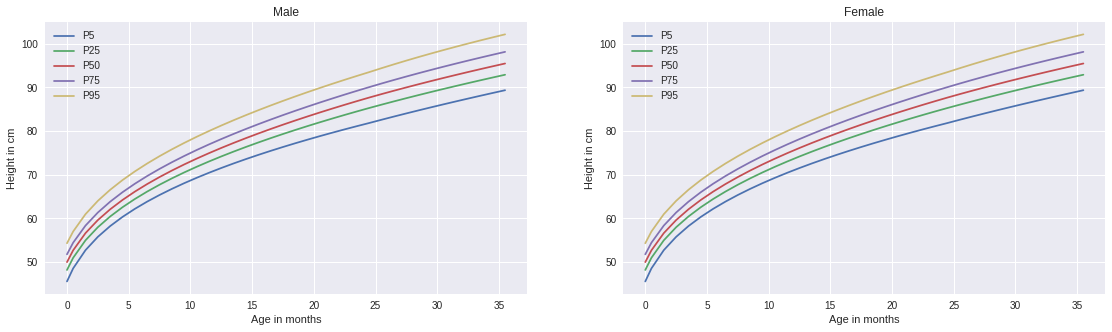

In [92]:
male = height_parsed.loc[height_parsed['Sex'] == 1]
female = height_parsed.loc[height_parsed['Sex'] == 2]


fig, ax = plt.subplots(nrows=1, 
                       ncols=2, 
                       figsize=(19,5))

ax[0].set_title("Male")

for n in [male]:
    ax[0].plot(male.Agemos, male.P5, label="P5")  
    ax[0].plot(male.Agemos, male.P25, label="P25")
    ax[0].plot(male.Agemos, male.P50, label="P50")
    ax[0].plot(male.Agemos, male.P75, label="P75")
    ax[0].plot(male.Agemos, male.P95, label="P95")
    

ax[0].set_xlabel('Age in months')
ax[0].set_ylabel('Height in cm')

leg = ax[0].legend(loc=9, mode="expand")

ax[1].set_title("Female")

for n in [female]:
    ax[1].plot(female.Agemos, male.P5, label="P5")  
    ax[1].plot(female.Agemos, male.P25, label="P25")
    ax[1].plot(female.Agemos, male.P50, label="P50")
    ax[1].plot(female.Agemos, male.P75, label="P75")
    ax[1].plot(female.Agemos, male.P95, label="P95")

ax[1].set_xlabel('Age in months')
ax[1].set_ylabel('Height in cm')

leg = ax[1].legend(loc=9, mode="expand")

plt.show()

#   Ejercicio: Pasos Fronterizos de Argentina

*   Leer ubicaciones de pasos fronterizos y dibujar en un mapa.

In [0]:
link = 'https://raw.githubusercontent.com/'
path = 'DiploDatos/AnalisisYCuracion/master/input/pasos.json'
paths = pd.read_json(link + path)

In [0]:
# Place map
gmap = gmplot.GoogleMapPlotter(-37.0196623, -81.638813, 4)

lats, lons = zip(*paths.location)
gmap.scatter(lats, lons, '#a00e16', size=400)

# Draw
gmap.draw("my_map.html")


#  Ejercicio: Analizar texto


*   Utilizar un texto de proyecto Gutenberg en castellano
http://www.gutenberg.org/browse/languages/es
*   Contar palabras y ordenar por frecuencia
*   Limpiar preludio y licencia de Project Gutenberg
*   Omitir “palabras vacías” (stop words) y símbolos
*   Encontrar personajes
*   Hacer un análisis extra a gusto
*   Hint: Tutorial para español
https://relopezbriega.github.io/blog/2017/09/23/procesamiento-del-lenguaje-natural-con-python/
*  Usa spacy.io y github.com/chartbeat-labs/textacy



## Dependencias

In [0]:
import textacy
import spacy
import random
from spacy import displacy
from collections import Counter

## Análisis

In [96]:
# descargamos el archivo y lo leemos
link = "http://www.gutenberg.org/cache/epub/34565/pg34565.txt"

texto = ''
name = 'CRÓNICAS DE MARIANELA'
start =  '*** START OF THIS PROJECT GUTENBERG EBOOK '+ name +' ***\n'
stop = '*** END OF THIS PROJECT GUTENBERG EBOOK '+ name +' ***\n'

textacy.io.http.write_http_stream(link, "texto.txt")

332kB [00:00, 5.24MB/s]                   


In [0]:
# limpiamos preludio y licencia de Project Gutenberg
with open('texto.txt') as fp:
    for line in iter(fp.readline, start):
        pass
    for line in iter(fp.readline, stop):
        texto += line

In [0]:
# descartamos mails y urls, remplazamos palabras con acento y fixeamos 
# unicodes rotos como mojibake
text = textacy.preprocess.preprocess_text(texto, 
                                          fix_unicode=True,
                                          no_urls=True, 
                                          no_emails=True,
                                          no_punct=True)

# eliminamos signos
text = textacy.preprocess.remove_punct(text, marks="-- * * * * *\n")

# normalizamos espacios en blanco
text = textacy.preprocess.normalize_whitespace(text)

text_lower = textacy.preprocess.preprocess_text(text, 
                                                lowercase=True,
                                                transliterate=True)

nlp = textacy.load_spacy('es_core_news_md')

# procesamos el texto
texto_procesado_lower = nlp(text_lower)
texto_procesado = nlp(text)

textacy.TextStats(texto_procesado).basic_counts

In [0]:
# descartamos palabras vacias, stop words, los símbolos y las que 
# tiene frecuencia menor a 10

words = textacy.extract.words(texto_procesado_lower, 
                              filter_stops=True, 
                              min_freq=10)

In [0]:
# Contar palabras y ordenar por frecuencia
counts_w = Counter()

for token in words:
    counts_w[token.orth_] += 1

In [60]:
# Mostramos las 10 palabras más comunes    
counts_w.most_common(20)

[('y', 1518),
 ('a', 1055),
 ('amor', 117),
 ('o', 117),
 ('mundo', 99),
 ('vida', 95),
 ('mujer', 87),
 ('espiritu', 78),
 ('marido', 73),
 ('hombre', 70),
 ('petrona', 59),
 ('casa', 58),
 ('rey', 49),
 ('amiga', 47),
 ('hijita', 47),
 ('demas', 41),
 ('secreto', 41),
 ('forma', 39),
 ('marianela', 38),
 ('hombres', 38)]

In [61]:
set(ent.label_ for ent in texto_procesado.ents)

{'LOC', 'MISC', 'ORG', 'PER'}

In [0]:
personajes = textacy.extract.named_entities(texto_procesado, 
                                            include_types=["PER"])

In [0]:
# Contar personajes y ordenar por frecuencia
counts_p = Counter()

for span in personajes:
    counts_p[span.orth_] += 1

In [64]:
# Mostramos los personajes usando textacy    
counts_p.most_common(20)

[('Eleuterio', 28),
 ('Inesita', 19),
 ('Marianela', 18),
 ('Así', 14),
 ('', 13),
 ('Yo', 13),
 ('Jorge', 13),
 ('Ricardo', 12),
 ('Esquilón', 12),
 ('Margarita', 9),
 ('Dios', 8),
 ('Además', 7),
 ('Francisco Agustín Florencio', 7),
 ('Trajano', 7),
 ('Jorgito', 6),
 ('Bautista', 6),
 ('Claro', 5),
 ('Rosalía', 5),
 ('Hijita', 5),
 ('Daniel', 5)]

In [65]:
# Mostramos los personajes usando un script, desaparece "('', 13)"
def extract_entities(doc, entity):
    personajes = Counter()
    
    for ent in doc.ents:
        if ent.label_ == entity:
            personajes[ent.lemma_] += 1
            
    return personajes.most_common(20)
  
extract_entities(texto_procesado, 'PER')

[('Eleuterio', 28),
 ('Inesita', 19),
 ('Marianela', 18),
 ('Así', 14),
 ('Yo', 13),
 ('Jorge', 13),
 ('Ricardo', 12),
 ('Esquilón', 12),
 ('Margarita', 9),
 ('Dios', 8),
 ('Además', 7),
 ('Francisco Agustín Florencio', 7),
 ('Trajano', 7),
 ('Jorgito', 6),
 ('Bautista', 6),
 ('Claro', 5),
 ('Rosalía', 5),
 ('Hijita', 5),
 ('Daniel', 5),
 ('Luisita', 5)]

In [0]:
colors = {'PER': 'linear-gradient(90deg, #aa9cfc, #fc9ce7)'}
options = {'ents': ['PER'], 'colors': colors}


# descomentar las siguientes lineas para ver el texto resaltado
#displacy.render(texto_procesado, 
#                style='ent', 
#                options=options, 
#                jupyter=True)

**Podemos observar, que existen personajes que el parser no pudo reconocer y también varios falsos positivos, esto se debe a que el core no es lo suficiente "grande" y le estaría faltando información para considerar estos casos. 
Hemos probado los dos cores que provee Spacy para el español y hubo una mejora al usar el de mayor peso.
Una manera de mejorar los resultados podría ser agregando entidades personalizadas para entrenar el modelo. **

### Análisis extra

In [77]:
# creamos "poemas" random
def word_pos(text):
  result = {'noun': [],
            'adj': [],
            'adv': [],
            'propn': [],
            'adp': [],
            'verb': []
           }

  for word in text:
    if word.pos_ is 'NOUN':
      result['noun'].append(word)
    if word.pos_ is 'ADJ':
      result['adj'].append(word) 
    if word.pos_ is 'ADV':
      result['adv'].append(word) 
    if word.pos_ is 'PROPN':
      result['propn'].append(word)
    if word.pos_ is 'ADP':
      result['adp'].append(word)      
    if word.pos_ is 'VERB':
      result['verb'].append(word)   
  return result


words = word_pos(texto_procesado)

for i in range(10):
    print("{} {} {} {} {}".format(random.choice(words['propn']),
                                  random.choice(words['verb']),
                                  random.choice(words['adp']),
                                  random.choice(words['noun']),
                                  random.choice(words['adj']), 
                                  ))


Piensas acabe a bocas incapaces
cuñado oía con hermana sola
Chajales decir de rincones navegantes
Clotilde seduce a presupuestos sugestionable
Mi tiene de muchedumbre culto
Nenín quieras para nieto rígidos
Pública daban ante fundamento altos
Chamfort produce en fusión asidas
Rodríguez sacaré a poetas moral
Mi Estuve con vida modernos


#  Ejercicio: Representación de grafos

In [0]:
edgeList = [[0, 2], [1, 3], [2, 3], [2, 4], [3, 5], [4, 5]]

In [69]:
# lista de adyacencia implementada con diccionario
start = timeit.default_timer()

adjList = {}

for elem in edgeList:
  if elem[0] in adjList:
      adjList[elem[0]].append(elem[1])
  else:
    adjList[elem[0]] = [elem[1]]
    
values = adjList.values()

stop = timeit.default_timer()
execution_time = stop - start

print("Lista de adyacencia:")
print("\n {}".format(list(values)))
print("\n Time: {}".format(execution_time)) 

Lista de adyacencia:

 [[2], [3], [3, 4], [5], [5]]

 Time: 0.00013894499988964526


In [70]:
# matriz de adyacencia
start = timeit.default_timer()

size = max(max(adjList.keys()), max(max(adjList.values()))) +  1
adjMatrix = np.zeros((size, size), dtype=np.int8)

for key_list in adjList.keys():
  for index in adjList[key_list]:
    adjMatrix[key_list, index] = 1

stop = timeit.default_timer()
execution_time = stop - start

print("Matriz de adyacencia:")
print("\n {}".format(adjMatrix))
print("\n Time: {}".format(execution_time)) 

Matriz de adyacencia:

 [[0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]

 Time: 0.00017312599993601907
